## **Data Engineering Task Notebook**

This notebook is designed to test you through various Data Engineering tasks using the Online Retail II dataset. The tasks will help you develop essential skills in data cleaning, feature engineering, and transforming raw data into valuable insights. You'll explore tasks like handling missing values, aggregating data, creating new features, and performing data joins to simulate real-world data workflows. These tasks will prepare you for more advanced data manipulation and analysis, enhancing your ability to work with large, complex datasets.

# **About the Dataset**
This Online Retail II dataset contains transactional data from a UK-based online retailer selling unique gift-ware. The data covers transactions that occurred between December 1, 2009 and December 9, 2011. The retailer primarily serves both individual customers and wholesalers. The products sold by the company are all-occasion gift items, including home décor, kitchenware, and other unique items.

The dataset includes detailed information on each transaction, providing valuable insights into customer behavior, sales trends, and product performance over time.



## **What can be done with this dataset?**

**Customer Behavior Analysis:** Explore purchasing patterns, repeat customers, and sales volume across different customer segments.

**Sales Forecasting:** Predict future sales by analyzing past transactions, including seasonal trends and demand fluctuations.

**Market Segmentation:** Identify customer groups based on purchase history and demographic data (e.g., by Country).

**Product Performance:** Analyze which products are bestsellers and which have low turnover, and how prices influence sales.

**Time Series Analysis:** Study trends over time, including hourly, daily, and monthly sales volumes, and identify peak shopping periods.

**Anomaly Detection:** Detect potential fraudulent transactions, cancellations, or unusually high sales activity.
Association Rule Mining: Discover products that are often purchased together and identify cross-sell opportunities.



## **Key Attributes in the Dataset:**

**InvoiceNo:** Unique transaction identifier (with cancellations indicated by 'C' prefix).

**StockCode:** Unique product code for each item sold.

**Description:** Name of the product/item sold.

**Quantity:** Quantity of each product sold in the transaction
.
**InvoiceDate:** Date and time of the transaction.

**UnitPrice:** Price per unit of the product.

**CustomerID:** Unique identifier for each customer.

**Country:** The country where the customer resides.

This dataset is a great resource for learning and practicing various data analysis, machine learning, and business intelligence techniques.

## **Exercise**
Complete the following tasks:
1. Load the [dataset](https://www.kaggle.com/datasets/lakshmi25npathi/online-retail-dataset) from Kaggle.
2. Visualize the dataset and it's structure using appropriate libraries and plots.
3. Do some basic cleaning to handle missing values
4. Create the following features:
  *   Revenue
  *   DayOfWeek: to analyze sales trends by weekdays.
  *   TotalRevenue for each CustomerID
  *   Most popular product based on Revenue.
  *   Ordersize by summing Quantity for each InvoiceNo
5. Apply a lambda function to:
  * Segment customers into tiers based on TotalRevenue (e.g., "High", "Medium", "Low").
  * Extract key information from Description and add them as columns (e.g., presence of specific keywords like "Gift" or "Discount"). At least one extra column should be added
  * Categorize transactions as "Small", "Medium", or "Large" based on Revenue.
  * **Detect Seasonal Items:** Flag items as "Christmas"-themed if the description contains relevant words.
  * Classify customers as "Loyal", "Occasional", or "One-time" based on the number of purchases.
  *  **Identify Multi-Item Invoices:** Flag invoices with multiple unique items as "Multi-Item Order".
7. Wrap all fo the above into an ETL pipeline.

Extra tasks for practicing GroupBy
1. Join CustomerID with TotalRevenue to create Customer_Revenue column
2. Group by Country to find total revenue, total customers, and average order size per country.
3. Group by StockCode to find top-selling products by quantity.
4. Group by CustomerID to calculate the average order value or frequency of purchases.







             








In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import os

In [44]:
path = kagglehub.dataset_download("lakshmi25npathi/online-retail-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\sebas\.cache\kagglehub\datasets\lakshmi25npathi\online-retail-dataset\versions\1


In [45]:
dataset_path = "C:\\Users\\sebas\\.cache\\kagglehub\\datasets\\lakshmi25npathi\\online-retail-dataset\\versions\\1"

files = os.listdir(dataset_path)
print(files)


['online_retail_II.xlsx']


In [46]:
file_path = r"C:\Users\sebas\.cache\kagglehub\datasets\lakshmi25npathi\online-retail-dataset\versions\1\online_retail_II.xlsx"

df = pd.read_excel(file_path)

In [47]:
print(df.head())

  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom  


In [48]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB
None


In [49]:
print(df.isnull().sum())

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64


In [50]:
# Fill missing 'Description' using the most common value per 'StockCode'
df['Description'] = df.groupby('StockCode')['Description'].transform(lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else x)

#Drop rows where 'Customer ID' is missing
df = df.dropna(subset=['Customer ID'])

print(df.isnull().sum())


Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64


In [51]:
print(df.duplicated().sum())

6771


In [52]:
df.drop_duplicates(inplace=True)
print(df.duplicated().sum())

0


In [53]:
df.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

In [54]:
#Exploring
df.describe(include='all')

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
count,410763.0,410763,410763,410763.000000,410763,410763.000000,410763.000000,410763
unique,23587.0,4031,4459,NaN,NaN,NaN,NaN,37
top,500356.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,NaN,NaN,NaN,United Kingdom
freq,251.0,3199,3199,NaN,NaN,NaN,NaN,372705
mean,NaN,NaN,NaN,12.923735,2010-06-30 19:56:14.853674752,3.908358,15353.621857,NaN
min,NaN,NaN,NaN,-9360.000000,2009-12-01 07:45:00,0.000000,12346.000000,NaN
25%,NaN,NaN,NaN,2.000000,2010-03-26 09:46:00,1.250000,13979.000000,NaN
50%,NaN,NaN,NaN,5.000000,2010-07-08 15:09:00,1.950000,15311.000000,NaN
75%,NaN,NaN,NaN,12.000000,2010-10-14 12:32:00,3.750000,16797.000000,NaN
max,NaN,NaN,NaN,19152.000000,2010-12-09 20:01:00,25111.090000,18287.000000,NaN


In [55]:
print(df.isnull().sum())

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64


# ETL pipeline

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import os

# -Extract-----

# Download the dataset
path = kagglehub.dataset_download("lakshmi25npathi/online-retail-dataset")
dataset_path = "C:\\Users\\sebas\\.cache\\kagglehub\\datasets\\lakshmi25npathi\\online-retail-dataset\\versions\\1"
files = os.listdir(dataset_path)
file_path = r"C:\Users\sebas\.cache\kagglehub\datasets\lakshmi25npathi\online-retail-dataset\versions\1\online_retail_II.xlsx"
retail_data = pd.read_excel(file_path)


# -Transform----

# Remove duplicates
retail_data.drop_duplicates(inplace=True)

# Filling missing "costumer ID". Could be guest checkouts, so should rename with "Unkown", but since the column is int64, we use placeholder value of "-1"
retail_data['Customer ID'] = retail_data['Customer ID'].fillna(-1).astype(int)

# Filling missing "Description" with "Unkown Product"
retail_data['Description'] = retail_data['Description'].fillna('Unknown Product')

# Drop rows with the important missing value: "Invoice", since it serves as a unique order number for each transaction and means the order is likely broken.
retail_data.dropna(subset=['Invoice'], inplace=True)

# Running final check for missing values reveals no more missing values in either Country, Price or anyother column.
print(retail_data.isnull().sum())

### Add Feature Engineering from Task 4

# Revenue
retail_data['Revenue'] = retail_data['Quantity'] * retail_data['Price']

# DayOfWeek. I could have used ".dayOfWeek", so it would be represented as a integer, instead of ".day_name" , but I choose here to use the name of the day for better readability.
retail_data['DayOfWeek'] = retail_data['InvoiceDate'].dt.day_name()

# TotalRevenue for each CustomerID (most exclude guest checkouts (Customer ID = -1))
total_revenue_per_customer = retail_data[retail_data['Customer ID'] != -1].groupby('Customer ID')['Revenue'].sum().reset_index().rename(columns={'Revenue': 'TotalRevenue'})

# Merge the total revenue column back into the main DataFrame. This task was optional , but it will look good for final results
retail_data = retail_data.merge(total_revenue_per_customer, on='Customer ID', how='left')

# Most popular product based on Revenue. This wont be stored as a column.
product_revenue = (
    retail_data.groupby('Description')['Revenue']
    .sum()
    .sort_values(ascending=False)
)

# Lets print the top products based on revenue
most_popular_products = product_revenue.head(25)
rank = 1
for product in most_popular_products.index:
    print(f"Rank {rank}: {product} - Revenue: {most_popular_products[product]:.2f}")
    rank += 1

# Ordersize by summing Quantity for each InvoiceNo
order_sizes = (
    retail_data.groupby('Invoice')['Quantity']
    .sum()
    .reset_index()
    .rename(columns={'Quantity': 'OrderSize'})
)
retail_data = retail_data.merge(order_sizes, on='Invoice', how='left')

### Add Feature Engineering from Task 5

# Segment customers into tiers based on TotalRevenue (e.g., "High", "Medium", "Low")
# Quantile is perfect for this. since it divides the data into qual sized portions. 
# 80% of customers will be classified as "High", between 20% to 80% as "Medium" and bellow 20% as "Low".
high_revenue_threshold = retail_data['TotalRevenue'].quantile(0.80)
low_revenue_threshold = retail_data['TotalRevenue'].quantile(0.20)

retail_data['CustomerTier'] = retail_data['TotalRevenue'].apply(
    lambda x: 'High' if x >= high_revenue_threshold else ('Medium' if x >= low_revenue_threshold else 'Low')
)   

#Extract key information from Description and add them as columns (e.g., presence of specific keywords like "Gift" or "Discount"). At least one extra column should be added
retail_data['HasGift'] = retail_data['Description'].str.contains('gift', case=False, na=False)
retail_data['HasDiscount'] = retail_data['Description'].str.contains('discount', case=False, na=False)
retail_data['HasPack'] = retail_data['Description'].str.contains('pack', case=False, na=False)
retail_data['HasSet'] = retail_data['Description'].str.contains('set', case=False, na=False)
retail_data['HasBox'] = retail_data['Description'].str.contains('box', case=False, na=False)


# Categorize transactions as "Small", "Medium", or "Large" based on Revenue. ( Check statiscs below where I determined the thresholds)
retail_data['TransactionSize'] = retail_data['Revenue'].apply(
    lambda y: 'Small' if y < 10 else ('Medium' if y < 20 else 'Large')
)

# Detect Seasonal Items: Flag items as "Christmas"-themed if the description contains relevant words.
retail_data['ForChristmas'] = retail_data['Description'].str.contains('Christmas|Xmas|Santa', case=False, na=False)

# Classify customers as "Loyal", "Occasional", or "One-time" based on the number of purchases.
# To solve this I'll count the number of purchases (unquie Invoices) per customer and add some treshold for difference between Loyal and occasional 
# ( Check statiscs below where I determined the thresholds)
invoice_counts = (
    retail_data[retail_data['Customer ID'] != -1]
    .groupby('Customer ID')['Invoice']
    .nunique()
    .reset_index()
    .rename(columns={'Invoice': 'NumPurchases'})
)

retail_data = retail_data.merge(invoice_counts, on='Customer ID', how='left')

retail_data['CustomerType'] = retail_data['NumPurchases'].apply(
    lambda n: 'Loyal' if n > 5 else ('Occasional' if n > 1 else 'One-time')
)

#  Identify Multi-Item Invoices: Flag invoices with multiple unique items as "Multi-Item Order".
# To do this I will just see if an "Invoice" have multipule "StockCodes"
multi_item_flags = (
    retail_data.groupby('Invoice')['StockCode']
    .nunique()
    .reset_index()
    .rename(columns={'StockCode': 'UniqueItems'})
)

retail_data = retail_data.merge(multi_item_flags, on='Invoice', how='left')

retail_data['MultiItemOrder'] = retail_data['UniqueItems'].apply(
    lambda z: 'Multi-Item Order' if z > 1 else 'Single-Item Order'
)

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64
Rank 1: REGENCY CAKESTAND 3 TIER - Revenue: 162885.71
Rank 2: WHITE HANGING HEART T-LIGHT HOLDER - Revenue: 157580.28
Rank 3: DOTCOM POSTAGE - Revenue: 116401.99
Rank 4: ASSORTED COLOUR BIRD ORNAMENT - Revenue: 72251.32
Rank 5: PAPER CHAIN KIT 50'S CHRISTMAS  - Revenue: 57808.25
Rank 6: JUMBO BAG RED RETROSPOT - Revenue: 56329.56
Rank 7: PARTY BUNTING - Revenue: 49626.92
Rank 8: ROTATING SILVER ANGELS T-LIGHT HLDR - Revenue: 47641.89
Rank 9: POSTAGE - Revenue: 46092.36
Rank 10: JUMBO BAG STRAWBERRY - Revenue: 36668.41
Rank 11: EDWARDIAN PARASOL NATURAL - Revenue: 36422.16
Rank 12: VINTAGE UNION JACK BUNTING - Revenue: 35717.71
Rank 13: STRAWBERRY CERAMIC TRINKET BOX - Revenue: 33750.95
Rank 14: JUMBO  BAG BAROQUE BLACK WHITE - Revenue: 32080.99
Rank 15: EDWARDIAN PARASOL BLACK - Revenue: 32077.14
Rank 16: JUMBO STORAGE BAG SUKI - Revenue: 

<h3> Below are cells I used to do various calculations to determind different thresholds and finding / confirming suitable keywords. </h>

In [57]:
keyword = 'gift'

# How I check for keyword "Gift"
gift_rows = retail_data[retail_data['Description'].str.contains(keyword, case=False, na=False)]


print(gift_rows[['Description']].head(10))

gift_count = retail_data['Description'].str.contains(keyword, case=False, na=False).sum()
print(f"Number of rows containing {keyword}: {gift_count}")

                          Description
79    SET OF THREE VINTAGE GIFT WRAPS
82           VINTAGE DESIGN GIFT TAGS
300     SET OF THREE 50'S GIFT WRAPS 
308          VINTAGE DESIGN GIFT TAGS
357  ENGLISH ROSE TEA SET IN GIFT BOX
378   SET OF THREE VINTAGE GIFT WRAPS
406   SET OF THREE VINTAGE GIFT WRAPS
621   SET OF THREE VINTAGE GIFT WRAPS
664     SET OF THREE 50'S GIFT WRAPS 
755          VINTAGE DESIGN GIFT TAGS
Number of rows containing gift: 5162


In [58]:
# How I check for keyword "Discount"
keyword = 'discount'
gift_rows = retail_data[retail_data['Description'].str.contains(keyword, case=False, na=False)]


print(gift_rows[['Description']].head(10))

gift_count = retail_data['Description'].str.contains(keyword, case=False, na=False).sum()
print(f"Number of rows containing {keyword}: {gift_count}")

      Description
722      Discount
723      Discount
24403    Discount
29061    Discount
29595    Discount
38675    Discount
44278    Discount
61566    Discount
61567    Discount
62288    Discount
Number of rows containing discount: 100


In [59]:
keyword = 'discount'
gift_rows = retail_data[retail_data['Description'].str.contains(keyword, case=False, na=False)]


print(gift_rows[['Description']].head(10))

gift_count = retail_data['Description'].str.contains(keyword, case=False, na=False).sum()
print(f"Number of rows containing {keyword}: {gift_count}")

      Description
722      Discount
723      Discount
24403    Discount
29061    Discount
29595    Discount
38675    Discount
44278    Discount
61566    Discount
61567    Discount
62288    Discount
Number of rows containing discount: 100


In [60]:
keyword = 'pack'
gift_rows = retail_data[retail_data['Description'].str.contains(keyword, case=False, na=False)]


print(gift_rows[['Description']].head(10))

gift_count = retail_data['Description'].str.contains(keyword, case=False, na=False).sum()
print(f"Number of rows containing {keyword}: {gift_count}")

                            Description
44           PACK OF 6 SKULL PAPER CUPS
45       PACK OF 20 SKULL PAPER NAPKINS
87                   PACK 20 DOLLY PEGS
210  PACK OF 60 PINK PAISLEY CAKE CASES
246    PACK OF 72 RETRO SPOT CAKE CASES
572      PACK OF 60 MUSHROOM CAKE CASES
634  PACK 20 ENGLISH ROSE PAPER NAPKINS
682   PACK OF 12 HEARTS DESIGN TISSUES 
683      PACK OF 12 RED SPOTTY TISSUES 
690    PACK OF 72 RETRO SPOT CAKE CASES
Number of rows containing pack: 16422


In [61]:
keyword = 'set'
gift_rows = retail_data[retail_data['Description'].str.contains(keyword, case=False, na=False)]


print(gift_rows[['Description']].head(10))

gift_count = retail_data['Description'].str.contains(keyword, case=False, na=False).sum()
print(f"Number of rows containing {keyword}: {gift_count}")

                            Description
23          SET OF 3 BLACK FLYING DUCKS
54              DINOSAURS  WRITING SET 
55       SET OF MEADOW  FLOWER STICKERS
65      TOMATO CHARLIE+LOLA COASTER SET
66      CARROT CHARLIE+LOLA COASTER SET
72        BAKING SET 9 PIECE RETROSPOT 
73    RETRO SPOT TEA SET CERAMIC 11 PC 
79      SET OF THREE VINTAGE GIFT WRAPS
80  RETRO SPORT PARTY BAG + STICKER SET
86     SET/3 RUSSIAN DOLL STACKING TINS
Number of rows containing set: 51840


In [62]:
keyword = 'box'
gift_rows = retail_data[retail_data['Description'].str.contains(keyword, case=False, na=False)]


print(gift_rows[['Description']].head(10))

gift_count = retail_data['Description'].str.contains(keyword, case=False, na=False).sum()
print(f"Number of rows containing {keyword}: {gift_count}")

                             Description
4         STRAWBERRY CERAMIC TRINKET BOX
11    LUNCHBOX WITH CUTLERY FAIRY CAKES 
21                    PIZZA PLATE IN BOX
38           WOODEN BOX ADVENT CALENDAR 
47      PINK BLUE FELT CRAFT TRINKET BOX
74      LUNCHBOX WITH CUTLERY RETROSPOT 
105      KINGS CHOICE CIGAR BOX MATCHES 
106                    EMPIRE TISSUE BOX
113  SET3 BOOK BOX GREEN GINGHAM FLOWER 
114   SET/3 RED GINGHAM ROSE STORAGE BOX
Number of rows containing box: 31646


In [63]:
keyword = 'Xmas'
gift_rows = retail_data[retail_data['Description'].str.contains(keyword, case=False, na=False)]


print(gift_rows[['Description']].head(10))

gift_count = retail_data['Description'].str.contains(keyword, case=False, na=False).sum()
print(f"Number of rows containing {keyword}: {gift_count}")

                          Description
253718          PACK/12 XMAS FUN CARD
255913          PACK/12 XMAS FUN CARD
317040          PACK/12 XMAS FUN CARD
331945          PACK/12 XMAS FUN CARD
336179          PACK/12 XMAS FUN CARD
336341          PACK/12 XMAS FUN CARD
337365  RIBBON REEL, XMAS SOCK/BAUBLE
339979          PACK/12 XMAS FUN CARD
341993          PACK/12 XMAS FUN CARD
342178  RIBBON REEL, XMAS SOCK/BAUBLE
Number of rows containing Xmas: 108


In [64]:
keyword = 'Santa'
gift_rows = retail_data[retail_data['Description'].str.contains(keyword, case=False, na=False)]


print(gift_rows[['Description']].head(10))

gift_count = retail_data['Description'].str.contains(keyword, case=False, na=False).sum()
print(f"Number of rows containing {keyword}: {gift_count}")

                                Description
455     ASSORTED SANTA CHRISTMAS DECORATION
1292    ASSORTED SANTA CHRISTMAS DECORATION
5063    ASSORTED SANTA CHRISTMAS DECORATION
11018   ASSORTED SANTA CHRISTMAS DECORATION
13074   ASSORTED SANTA CHRISTMAS DECORATION
17438   ASSORTED SANTA CHRISTMAS DECORATION
20304   ASSORTED SANTA CHRISTMAS DECORATION
337597                 CARD MOTORBIKE SANTA
339709                 CARD MOTORBIKE SANTA
340094                 CARD MOTORBIKE SANTA
Number of rows containing Santa: 519


In [65]:
keyword = 'Holiday'
gift_rows = retail_data[retail_data['Description'].str.contains(keyword, case=False, na=False)]


print(gift_rows[['Description']].head(10))

gift_count = retail_data['Description'].str.contains(keyword, case=False, na=False).sum()
print(f"Number of rows containing {keyword}: {gift_count}")

                      Description
13523  FIRST CLASS HOLIDAY PURSE 
17460           VIP HOLIDAY PURSE
18251           VIP HOLIDAY PURSE
18384  FIRST CLASS HOLIDAY PURSE 
18385       ECONOMY HOLIDAY PURSE
19114           VIP HOLIDAY PURSE
19355  FIRST CLASS HOLIDAY PURSE 
20884       ECONOMY HOLIDAY PURSE
20888  FIRST CLASS HOLIDAY PURSE 
21277           VIP HOLIDAY PURSE
Number of rows containing Holiday: 796


In [66]:
# How I search for other keywords
from collections import Counter
import re

# Combine all descriptions into one string
all_words = ' '.join(retail_data['Description'].dropna().astype(str))

# Split into words and convert to lowercase
words = re.findall(r'\b\w+\b', all_words.lower())

common_words = Counter(words).most_common(50)
print(common_words)


[('set', 50396), ('red', 48736), ('bag', 40377), ('heart', 39309), ('of', 37240), ('pink', 34801), ('white', 29683), ('box', 26047), ('cake', 24315), ('metal', 24047), ('design', 23798), ('retrospot', 23398), ('blue', 21989), ('vintage', 21632), ('t', 19778), ('hanging', 19714), ('spotty', 19220), ('christmas', 19112), ('holder', 18679), ('sign', 18049), ('3', 17837), ('light', 17822), ('pack', 16318), ('paper', 16227), ('small', 15665), ('glass', 14865), ('tea', 14171), ('jumbo', 13860), ('in', 12430), ('spot', 12283), ('6', 11937), ('decoration', 11846), ('lunch', 11745), ('with', 11672), ('ceramic', 11588), ('card', 11411), ('rose', 11301), ('bottle', 11286), ('water', 11213), ('cases', 11135), ('hot', 11102), ('retro', 11101), ('large', 10999), ('wooden', 10993), ('fairy', 10593), ('12', 10363), ('mug', 10120), ('black', 9528), ('and', 9207), ('paisley', 8690)]


count    504731.000000
mean         20.351705
std          91.510976
min           0.001000
20%           3.360000
50%          10.200000
80%          19.900000
90%          34.000000
max       25111.090000
Name: Revenue, dtype: float64


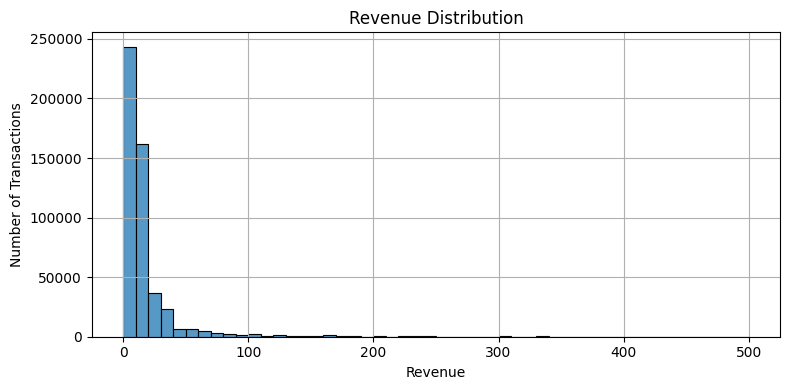

In [67]:
# To determind task about catogorizing transactions as "Small", "Medium", or "Large" I did some basic analysis on the Revenue destribution.

# Had to remove negative revenue for plot to make sense
positive_revenue = retail_data[retail_data['Revenue'] > 0]


print(positive_revenue['Revenue'].describe(percentiles=[0.2, 0.5, 0.8, 0.9]))


plt.figure(figsize=(8, 4))
sns.histplot(positive_revenue[positive_revenue['Revenue'] < 500]['Revenue'], bins=50, kde=False)
plt.title("Revenue Distribution")
plt.xlabel("Revenue")
plt.ylabel("Number of Transactions")
plt.grid(True)
plt.tight_layout()
plt.show()

# Results show that 80% are under 20 units and 90% are unde 34 units. 
# Mean is 20, while median is 10.
# This suggests that most transactions are small, with a few larger ones skewing the average higher
# To accomidate natural breaks in the data "Small" = 0-10. "Medum" = 10-20, "Large" = 20+


count    4383.000000
mean        5.381474
std        10.051921
min         1.000000
25%         1.000000
50%         3.000000
75%         6.000000
max       270.000000
Name: NumPurchases, dtype: float64
NumPurchases
1     1267
2      773
3      486
4      383
5      256
6      218
7      163
8      167
9       87
10      81
11      59
12      65
13      43
14      49
15      41
16      34
17      21
18      22
19      13
20       7
Name: count, dtype: int64


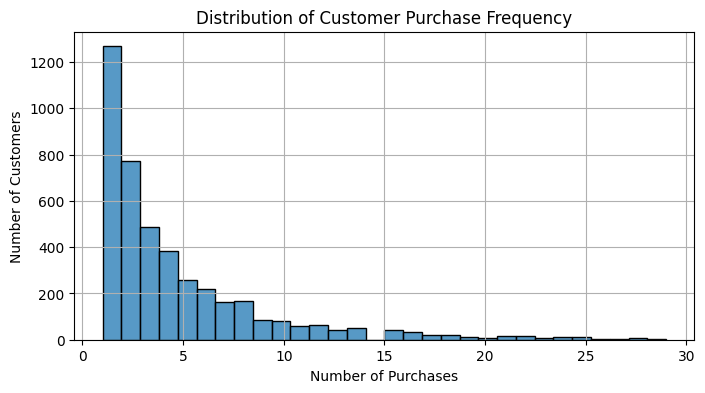

In [68]:
# To determind how often customers return to shop I will count the number of unique invoices per customer
invoice_counts = (
    retail_data[retail_data['Customer ID'] != -1]
    .groupby('Customer ID')['Invoice']
    .nunique()
    .reset_index()
    .rename(columns={'Invoice': 'NumPurchases'})
)


print(invoice_counts['NumPurchases'].describe())


print(invoice_counts['NumPurchases'].value_counts().sort_index().head(20))

plt.figure(figsize=(8, 4))
sns.histplot(invoice_counts[invoice_counts['NumPurchases'] < 30]['NumPurchases'], bins=30)
plt.title("Distribution of Customer Purchase Frequency")
plt.xlabel("Number of Purchases")
plt.ylabel("Number of Customers")
plt.grid(True)
plt.show()

# Results show that most customers only buy 1-3 times,
# but 25% of custumers buy more than 6 times. 
# These vaules seems good for the tresholds for "Loyal" and "Occasional" customers. But lets go with 5 instead of 6.

In [69]:
print(retail_data.isnull().sum())
# The reason total revenue is having so many nulls is because it is calculated for each customer, so guest checkouts (Customer ID = -1) will not have a total revenue value.

Invoice                 0
StockCode               0
Description             0
Quantity                0
InvoiceDate             0
Price                   0
Customer ID             0
Country                 0
Revenue                 0
DayOfWeek               0
TotalRevenue       107833
OrderSize               0
CustomerTier            0
HasGift                 0
HasDiscount             0
HasPack                 0
HasSet                  0
HasBox                  0
TransactionSize         0
ForChristmas            0
NumPurchases       107833
CustomerType            0
UniqueItems             0
MultiItemOrder          0
dtype: int64


In [70]:
# Lets display some of the data to see how it looks after the transformations. I think it looks really solid!
display(retail_data.head(5))
display(retail_data.sample(10))
display(retail_data.tail(5))

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue,DayOfWeek,...,HasDiscount,HasPack,HasSet,HasBox,TransactionSize,ForChristmas,NumPurchases,CustomerType,UniqueItems,MultiItemOrder
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.4,Tuesday,...,False,False,False,False,Large,True,7.0,Loyal,8,Multi-Item Order
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0,Tuesday,...,False,False,False,False,Large,False,7.0,Loyal,8,Multi-Item Order
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0,Tuesday,...,False,False,False,False,Large,False,7.0,Loyal,8,Multi-Item Order
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.8,Tuesday,...,False,False,False,False,Large,False,7.0,Loyal,8,Multi-Item Order
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.0,Tuesday,...,False,False,False,True,Large,False,7.0,Loyal,8,Multi-Item Order


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue,DayOfWeek,...,HasDiscount,HasPack,HasSet,HasBox,TransactionSize,ForChristmas,NumPurchases,CustomerType,UniqueItems,MultiItemOrder
3461,489699,22356,"CHARLOTTE BAG , PINK/WHITE SPOTS",10,2009-12-02 10:51:00,0.85,16700,United Kingdom,8.50,Wednesday,...,False,False,False,False,Small,False,15.0,Loyal,25,Multi-Item Order
290470,517989,21731,RED TOADSTOOL LED NIGHT LIGHT,1,2010-08-03 15:29:00,3.36,-1,United Kingdom,3.36,Tuesday,...,False,False,False,False,Small,False,NaN,One-time,126,Multi-Item Order
331335,522084,22585,PACK OF 6 BIRDY GIFT TAGS,12,2010-09-12 11:52:00,1.25,15992,United Kingdom,15.00,Sunday,...,False,True,False,False,Medium,False,2.0,Occasional,19,Multi-Item Order
242705,513187,21913,VINTAGE SEASIDE JIGSAW PUZZLES,8,2010-06-22 14:00:00,3.75,15129,United Kingdom,30.00,Tuesday,...,False,False,False,False,Large,False,12.0,Loyal,14,Multi-Item Order
64111,495183,20889,JARDIN DE FEMME SCENTED CANDLE,4,2010-01-21 13:48:00,2.95,15296,United Kingdom,11.80,Thursday,...,False,False,False,False,Medium,False,10.0,Loyal,71,Multi-Item Order
65219,495244,21204,DAISIES HONEYCOMB GARLAND,12,2010-01-22 10:51:00,1.65,15179,United Kingdom,19.80,Friday,...,False,False,False,False,Medium,False,10.0,Loyal,48,Multi-Item Order
350395,523889,84378,SET OF 3 HEART COOKIE CUTTERS,12,2010-09-24 14:32:00,1.25,14226,United Kingdom,15.00,Friday,...,False,False,True,False,Medium,False,2.0,Occasional,31,Multi-Item Order
449225,532613,22469,HEART OF WICKER SMALL,5,2010-11-12 15:20:00,4.21,-1,United Kingdom,21.05,Friday,...,False,False,False,False,Large,False,NaN,One-time,132,Multi-Item Order
306,489488,22301,COFFEE MUG CAT + BIRD DESIGN,2,2009-12-01 10:59:00,2.55,17238,United Kingdom,5.10,Tuesday,...,False,False,False,False,Small,False,17.0,Loyal,29,Multi-Item Order
145773,503427,21217,RED SPOTTY ROUND CAKE TINS,1,2010-03-31 17:29:00,9.95,13576,United Kingdom,9.95,Wednesday,...,False,False,False,False,Small,False,13.0,Loyal,33,Multi-Item Order


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue,DayOfWeek,...,HasDiscount,HasPack,HasSet,HasBox,TransactionSize,ForChristmas,NumPurchases,CustomerType,UniqueItems,MultiItemOrder
518591,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530,United Kingdom,5.90,Thursday,...,False,False,False,False,Small,False,4.0,Occasional,65,Multi-Item Order
518592,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530,United Kingdom,3.75,Thursday,...,False,False,False,False,Small,False,4.0,Occasional,65,Multi-Item Order
518593,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530,United Kingdom,3.75,Thursday,...,False,False,False,False,Small,False,4.0,Occasional,65,Multi-Item Order
518594,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530,United Kingdom,7.50,Thursday,...,False,False,False,False,Small,False,4.0,Occasional,65,Multi-Item Order
518595,538171,21931,JUMBO STORAGE BAG SUKI,2,2010-12-09 20:01:00,1.95,17530,United Kingdom,3.90,Thursday,...,False,False,False,False,Small,False,4.0,Occasional,65,Multi-Item Order
